# Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Amazon_Best_Seller_2021_June.csv")

In [5]:
df.head()

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99


In [6]:
df.describe()

,Rating
count,707.000000
mean,4.593494
std,0.284117
min,1.400000
25%,4.500000
50%,4.700000
75%,4.800000
max,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASIN           707 non-null    object 
 1   Category       707 non-null    object 
 2   Product Link   707 non-null    object 
 3   No of Sellers  707 non-null    object 
 4   Rank           707 non-null    object 
 5   Rating         707 non-null    float64
 6   Reviews Count  707 non-null    object 
 7   Price          707 non-null    object 
dtypes: float64(1), object(7)
memory usage: 44.3+ KB


In [8]:
df

,ASIN,Category,Product Link,No of Sellers,Rank,Rating,Reviews Count,Price
0,B079QHML21,Electronics,https://www.amazon.com/gp/offer-listing/B079QH...,1 Sellers,#1,4.7,"640,721",$39.99
1,B07FZ8S74R,Electronics,https://www.amazon.com/gp/offer-listing/B07FZ8...,1 Sellers,#2,4.7,"854,114",$34.99
2,B07XJ8C8F5,Electronics,https://www.amazon.com/gp/offer-listing/B07XJ8...,1 Sellers,#3,4.7,"267,821",$44.99
3,B07WVFCVJN,Electronics,https://www.amazon.com/gp/offer-listing/B07WVF...,27 Sellers,#4,4.8,"114,267",$28.48
4,B08YT2N5SX,Electronics,https://www.amazon.com/gp/offer-listing/B08YT2...,1 Sellers,#5,4.7,"267,821",$49.99
...,...,...,...,...,...,...,...,...
702,B007DW6F34,Toys & Games,https://www.amazon.com/gp/offer-listing/B007DW...,10 Sellers,#95,4.6,"8,795",$6.99
703,B01N16VX79,Toys & Games,https://www.amazon.com/gp/offer-listing/B01N16...,5 Sellers,#96,4.7,649,$16.99
704,B09197N995,Toys & Games,https://www.amazon.com/gp/offer-listing/B09197...,1 Sellers,#97,4.8,"9,121",$8.99
705,B015CCR1FW,Toys & Games,https://www.amazon.com/gp/offer-listing/B015CC...,26 Sellers,#98,4.7,"18,449",$19.99


In [14]:
df['Category'].unique()

array(['Electronics', 'Clothing, Shoes & Jewelry', 'Gift Cards', 'Books',
       'Video Games', 'Camera & Photo', 'Toys & Games'], dtype=object)

In [9]:
df.drop(['Product Link','ASIN','No of Sellers'],axis=1,inplace=True)
df.head()

,Category,Rank,Rating,Reviews Count,Price
0,Electronics,#1,4.7,"640,721",$39.99
1,Electronics,#2,4.7,"854,114",$34.99
2,Electronics,#3,4.7,"267,821",$44.99
3,Electronics,#4,4.8,"114,267",$28.48
4,Electronics,#5,4.7,"267,821",$49.99


In [15]:
def Category(x):
        if x=='Electronics':
             return 1
        if x=='Clothing, Shoes & Jewelry':
             return 2 
        if x=='Gift Cards':
             return 3     
        if x=='Books':
             return 4     
        if x=='Video Games':
             return 5     
        if x=='Camera & Photo':
             return 6
        if x=='Toys & Games':
             return 7    
            
df['Category']=df['Category'].apply(Category)
df

,Category,Rank,Rating,Reviews Count,Price
0,1,#1,4.7,"640,721",$39.99
1,1,#2,4.7,"854,114",$34.99
2,1,#3,4.7,"267,821",$44.99
3,1,#4,4.8,"114,267",$28.48
4,1,#5,4.7,"267,821",$49.99
...,...,...,...,...,...
702,7,#95,4.6,"8,795",$6.99
703,7,#96,4.7,649,$16.99
704,7,#97,4.8,"9,121",$8.99
705,7,#98,4.7,"18,449",$19.99


In [26]:
df['Category'] = df['Category'].astype('int')

In [28]:
df['Rank'] = df['Rank'].astype('float')

ValueError: could not convert string to float: '#1'

In [30]:
df['Reviews Count'] = df['Reviews Count'].astype('float')

ValueError: could not convert string to float: '640,721'

In [31]:
df['Price'] = df['Price'].astype('float')

ValueError: could not convert string to float: '$39.99 '

In [16]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

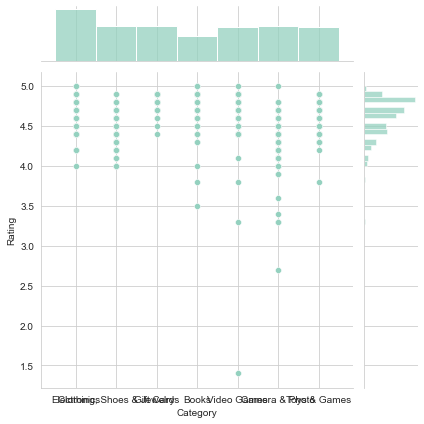

In [18]:
# More time on site, more money spent.
sns.jointplot(x='Category',y='Rating',data=customers)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

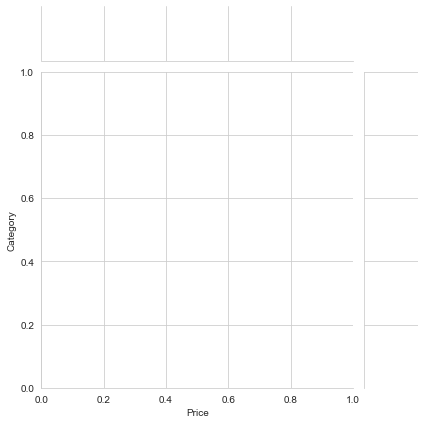

In [22]:
sns.jointplot(x='Price',y='Category',kind='hex',data=customers)

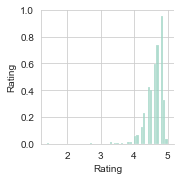

In [23]:
sns.pairplot(customers)

In [285]:
# Length of Membership 

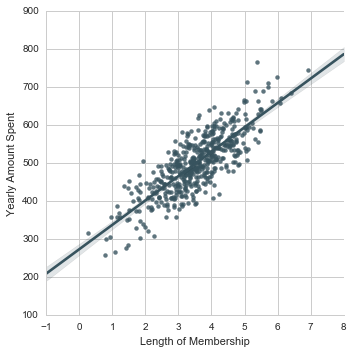

In [286]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [287]:
y = customers['Yearly Amount Spent']

In [288]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [291]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [292]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [293]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [294]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [295]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

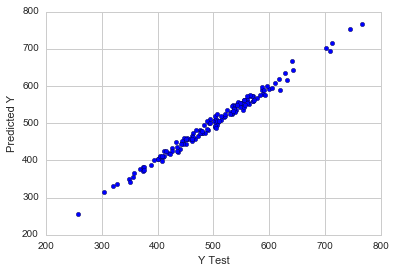

In [296]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [303]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

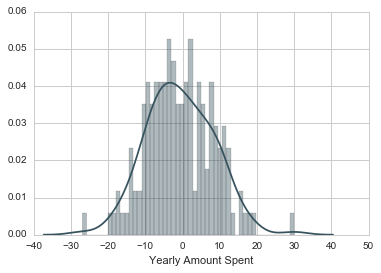

In [317]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [298]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.